# Import all libraries

In [12]:
from Mnist_Classifier_CNN import MNIST_CNN
from Mnist_Classifier_NN import MNIST_NN

import random
from tqdm import tqdm
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

# Load MNIST dataset

In [13]:
dataset = torchvision.datasets.MNIST(root = 'datasets', train = True, download = True, transform=torchvision.transforms.ToTensor())

#### Get and visualize random individual

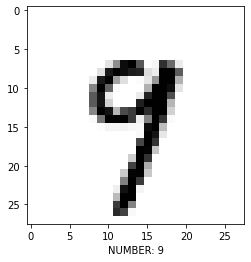

In [14]:
rand_individ = random.randint(0, 60_000)
img = dataset[rand_individ][0].view((28, 28))
ans = dataset[rand_individ][1]
plt.imshow(img, cmap='Greys')
plt.xlabel(f"NUMBER: {ans}")
pass

# Prepare and split data into train/test

In [15]:
split_ratio = 0.90
train_size = round(len(dataset) * split_ratio)
valid_size = len(dataset) - train_size

train, valid = torch.utils.data.random_split(dataset, [train_size, valid_size])

train_batch_loader = torch.utils.data.DataLoader2(train, batch_size=50)
valid_batch_loader = torch.utils.data.DataLoader2(valid, batch_size=50)

# Configure NN Model and hyper-parameters

In [16]:
mnist_nn = MNIST_NN(28*28, 10)

epochs = 5
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.ASGD(mnist_nn.parameters(), lr=0.8)

history = []

# Train loop

In [17]:
for epoch in range(0, epochs):
    for i, (features, ans) in enumerate(tqdm(train_batch_loader)):
        # Forward pass
        Y_pred = mnist_nn.forward(features.view(-1, 28*28))

        loss = loss_func(Y_pred, ans)

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if i % 3 == 0: history.append(loss.data)

100%|██████████| 1080/1080 [00:07<00:00, 154.27it/s]


Mean CrossEntropyLoss (last 100): 0.028736760839819908


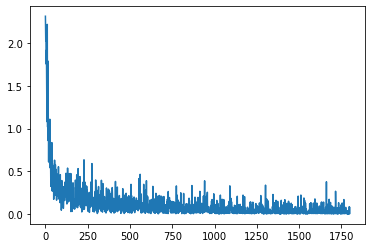

In [18]:
plt.plot(history)
print(f"Mean CrossEntropyLoss (last 100): {sum(history[-100:]) / 100}")

# Validation

In [19]:
with torch.no_grad():
    answers = torch.zeros(10)
    predictions = torch.zeros(10)

    for i, (features, ans) in enumerate(tqdm(valid_batch_loader)):
        predictions = torch.vstack((predictions, nn.functional.normalize(mnist_nn(features.view(-1, 28*28)))))

        # Convert to one-hot encoded
        ans = nn.functional.one_hot(ans, num_classes=10)

        answers = torch.vstack((answers, ans))

    print(f"MSE: {mse(predictions.T, answers.T)}")


100%|██████████| 120/120 [00:00<00:00, 223.70it/s]

MSE: 0.0453353188931942


# Visualisation test

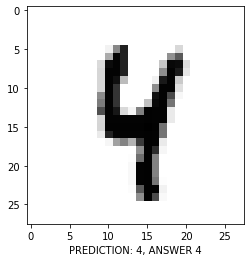

In [20]:
rand_individ = random.randint(0, 60_000)
img = dataset[rand_individ][0].view((28, 28))
ans = dataset[rand_individ][1]


with torch.no_grad():
    pred = mnist_nn(img.view(-1)).argmax()

plt.imshow(img, cmap='Greys')
plt.xlabel(f"PREDICTION: {pred}, ANSWER {ans}")
pass 

# Configure CNN Model and hyper-parameters

In [21]:
mnist_cnn = MNIST_CNN()

epochs = 2
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_cnn.parameters(), lr=0.01)

history = []

# Train loop

In [22]:
for epoch in range(0, epochs):
    for i, (features, ans) in enumerate(tqdm(train_batch_loader)):
        # Forward pass
        Y_pred = mnist_cnn.forward(features.view(-1, 1, 28, 28))
        # print(Y_pred.shape)

        loss = loss_func(Y_pred, ans)

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if i % 3 == 0: history.append(loss.data)

100%|██████████| 1080/1080 [00:22<00:00, 47.63it/s]


Mean CrossEntropyLoss (last 100): 0.05852634087204933


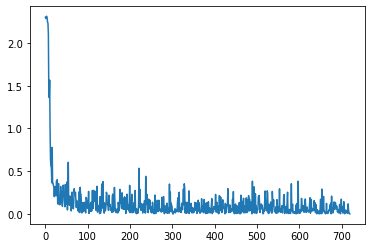

In [23]:
plt.plot(history)
print(f"Mean CrossEntropyLoss (last 100): {sum(history[-100:]) / 100}")

In [24]:
with torch.no_grad():
    answers = torch.zeros(10)
    predictions = torch.zeros(10)

    for i, (features, ans) in enumerate(tqdm(valid_batch_loader)):
        predictions = torch.vstack((predictions, nn.functional.normalize(mnist_cnn(features.view(-1, 1, 28, 28)))))

        # Convert to one-hot encoded
        ans = nn.functional.one_hot(ans, num_classes=10)

        answers = torch.vstack((answers, ans))

    print(f"MSE: {mse(predictions.T, answers.T)}")

100%|██████████| 120/120 [00:00<00:00, 140.00it/s]

MSE: 0.10312492400407791
